<a href="https://colab.research.google.com/github/aikazu/vystmedia-sdwebui-collab/blob/main/Stable_Diffusion_Vystmedia_nonGDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jika ingin menggunakan model dari Gdrive buat dulu folder bernama **SDdata** di root folder dan 3 folder didalam nya berisi **Checkpoint** **Lora** **Embeddings**

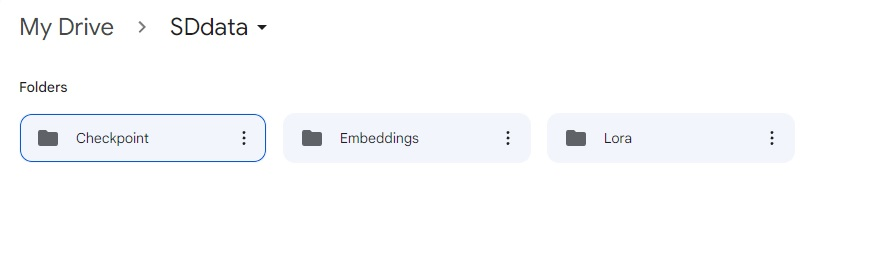

# Main Section
Install dan jalankan WebUI di section ini.

In [ ]:
#@title Install WebUI { display-mode: "form" }
#@markdown Jalankan ini untuk memulai instalasi.
import os
from google.colab.output import eval_js
os.environ['colab_url'] = eval_js("google.colab.kernel.proxyPort(7860, {'cache': false})")

!apt update -yqq
!apt install -yqq aria2 unionfs-fuse

!wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
!bash ./py310.sh -b -f -p /usr/local
!python -m ipykernel install --name "py310" --user

!apt install -qq libunwind8-dev
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.7-1ubuntu2/+build/18734182/+files/google-perftools_2.7-1ubuntu2_all.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.7-1ubuntu2/+build/18734182/+files/libgoogle-perftools-dev_2.7-1ubuntu2_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.7-1ubuntu2/+build/18734182/+files/libgoogle-perftools4_2.7-1ubuntu2_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.7-1ubuntu2/+build/18734182/+files/libtcmalloc-minimal4_2.7-1ubuntu2_amd64.deb
!dpkg -i *.deb
%env LD_PRELOAD=libtcmalloc.so
!rm *.deb

!pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --extra-index-url https://download.pytorch.org/whl/cu118 -U
!pip install -q --pre xformers==0.0.17rc482 -U
!pip install -q --pre triton

!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui /content/sdwebui
!git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /content/sdwebui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/AlUlkesh/stable-diffusion-webui-images-browser /content/sdwebui/extensions/content/sdwebui-images-browser
!git clone https://github.com/camenduru/stable-diffusion-webui-huggingface /content/sdwebui/extensions/content/sdwebui-huggingface
!git clone -b v2.0 https://github.com/camenduru/sd-civitai-browser /content/sdwebui/extensions/sd-civitai-browser
!git clone https://github.com/kohya-ss/sd-webui-additional-networks /content/sdwebui/extensions/sd-webui-additional-networks
!git clone https://github.com/Mikubill/sd-webui-controlnet /content/sdwebui/extensions/sd-webui-controlnet
!git clone https://github.com/camenduru/openpose-editor /content/sdwebui/extensions/openpose-editor
!git clone https://github.com/jexom/sd-webui-depth-lib /content/sdwebui/extensions/sd-webui-depth-lib
!git clone https://github.com/hnmr293/posex /content/sdwebui/extensions/posex
!git clone https://github.com/Bing-su/sd-webui-tunnels /content/sdwebui/extensions/sd-webui-tunnels
!git clone https://github.com/etherealxx/batchlinks-webui /content/sdwebui/extensions/batchlinks-webui
!git clone https://github.com/d8ahazard/sd_dreambooth_extension /content/sdwebui/extensions/sd_dreambooth_extension
%cd /content/sdwebui

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_canny-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_canny-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_depth-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_depth-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_hed-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_hed-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_mlsd-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_mlsd-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_normal-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_normal-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_openpose-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_openpose-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_scribble-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_scribble-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_seg-fp16.safetensors -d /content/sdwebui/extensions/sd-webui-controlnet/models -o control_seg-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/hand_pose_model.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/openpose -o hand_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/body_pose_model.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/openpose -o body_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/dpt_hybrid-midas-501f0c75.pt -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/midas -o dpt_hybrid-midas-501f0c75.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_large_512_fp32.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_large_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_tiny_512_fp32.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_tiny_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/network-bsds500.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/hed -o network-bsds500.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/upernet_global_small.pth -d /content/sdwebui/extensions/sd-webui-controlnet/annotator/uniformer -o upernet_global_small.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_style_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_style_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_sketch_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_seg_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_seg_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_openpose_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_openpose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_keypose_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_keypose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_depth_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_depth_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_color_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_color_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_canny_sd14v1.pth -d /content/sdwebui/extensions/sd-webui-controlnet/models -o t2iadapter_canny_sd14v1.pth

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/chilloutmix/resolve/main/chilloutmix_NiPrunedFp32Fix.safetensors -d /content/sdwebui/models/Stable-diffusion -o chilloutmix_NiPrunedFp32Fix.safetensors

!sed -i -e 's/    start()/    #start()/g' /content/sdwebui/launch.py
!sed -i -e 's/checkout {commithash}/checkout --force {commithash}/g' /content/sdwebui/launch.py

if not os.path.exists(f"/content/sdwebui/extensions/deforum-for-automatic1111-webui/models"):
  os.mkdir(f"/content/sdwebui/extensions/deforum-for-automatic1111-webui/models")

if not os.path.exists(f"/content/sdwebui/models/CLIP"):
  os.mkdir(f"/content/sdwebui/models/CLIP")

#@markdown Centang jika ingin menggunakan model dari Gdrive
useFuse = False #@param {type:"boolean"}
if useFuse:
  from google.colab import drive
  drive.mount('/content/drive')
  !unionfs-fuse -o nonempty /content/drive/MyDrive/SDdata/Checkpoint=RW /content/sdwebui/models/Stable-diffusion
  !unionfs-fuse -o nonempty /content/drive/MyDrive/SDdata/Lora=RW /content/sdwebui/extensions/sd-webui-additional-networks/models/lora
  !unionfs-fuse -o nonempty /content/drive/MyDrive/SDdata/Embeddings=RW /content/sdwebui/embeddings

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://openaipublic.azureedge.net/clip/models/b8cca3fd41ae0c99ba7e8951adf17d267cdb84cd88be6f7c2e0eca1737a03836/ViT-L-14.pt -d /content/sdwebui/models/CLIP -o ViT-L-14.pt

!python launch.py --skip-torch-cuda-test

!git reset --hard
!git pull
!git -C /content/sdwebui/extensions/deforum-for-automatic1111-webui reset --hard
!git -C /content/sdwebui/extensions/deforum-for-automatic1111-webui pull
!git -C /content/sdwebui/extensions/stable-diffusion-webui-images-browser reset --hard
!git -C /content/sdwebui/extensions/stable-diffusion-webui-images-browser pull
!git -C /content/sdwebui/extensions/stable-diffusion-webui-huggingface reset --hard
!git -C /content/sdwebui/extensions/stable-diffusion-webui-huggingface pull
!git -C /content/sdwebui/extensions/sd-civitai-browser reset --hard
!git -C /content/sdwebui/extensions/sd-civitai-browser pull
!git -C /content/sdwebui/extensions/sd-webui-additional-networks reset --hard
!git -C /content/sdwebui/extensions/sd-webui-additional-networks pull
!git -C /content/sdwebui/extensions/sd-webui-controlnet reset --hard
!git -C /content/sdwebui/extensions/sd-webui-controlnet pull
!git -C /content/sdwebui/extensions/openpose-editor reset --hard
!git -C /content/sdwebui/extensions/openpose-editor pull
!git -C /content/sdwebui/extensions/sd-webui-depth-lib reset --hard
!git -C /content/sdwebui/extensions/sd-webui-depth-lib pull
!git -C /content/sdwebui/extensions/posex reset --hard
!git -C /content/sdwebui/extensions/posex pull
!git -C /content/sdwebui/extensions/sd-webui-tunnels reset --hard
!git -C /content/sdwebui/extensions/sd-webui-tunnels pull
!git -C /content/sdwebui/extensions/batchlinks-webui reset --hard
!git -C /content/sdwebui/extensions/batchlinks-webui pull
!git -C /content/sdwebui/extensions/sd_dreambooth_extension reset --hard
!git -C /content/sdwebui/extensions/sd_dreambooth_extension pull

!sed -i -e 's/checkout {commithash}/checkout --force {commithash}/g' /content/sdwebui/launch.py
!sed -i -e '''/    prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/sdwebui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/sdwebui/launch.py
!sed -i -e 's/fastapi==0.89.1/fastapi==0.90.1/g' /content/sdwebui/requirements_versions.txt
!sed -i -e 's/accelerate==0.12.0/accelerate==0.17.1/g' /content/sdwebui/requirements_versions.txt
!sed -i -e 's/transformers==4.25.1/transformers==4.26.1/g' /content/sdwebui/requirements_versions.txt

print("Installed")

In [ ]:
#@title Run WebUI { display-mode: "form" }
#@markdown Jalankan ini untuk memulai WebUI setelah proses instalasi selesai.

!python launch.py --listen --xformers --enable-insecure-extension-access --theme dark --gradio-queue --clip-models-path /content/sdwebui/models/CLIP --cloudflared

# Misc Section
Kumpulan tambahan untuk download Checkpoint, Lora, Textual Inversion ke dalam Gdrive.

In [ ]:
#@title Download Checkpoint { display-mode: "form" }

from google.colab import drive
drive.mount('/content/drive')

!apt-get -y install -qq aria2

#@markdown Isi dengan link download
model_url = "https://civitai.com/api/download/models/11745" #@param {type:"string"}

#@markdown Isi dengan nama yang di inginkan
model_name = "ChilloutMix.safetensors" #@param {type:"string"}

model_url = f"\"{model_url}\""
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_url} -d /content/drive/MyDrive/SDdata/Checkpoint -o {model_name}


In [ ]:
#@title Download Lora { display-mode: "form" }

from google.colab import drive
drive.mount('/content/drive')

!apt-get -y install -qq aria2

#@markdown Isi dengan link download
model_url = "https://huggingface.co/aimainia/japaneseDollLikeness_v10/resolve/main/japaneseDollLikeness_v10.safetensors" #@param {type:"string"}

#@markdown Isi dengan nama yang di inginkan
model_name = "japaneseDollLikeness_v10.safetensors" #@param {type:"string"}

model_url = f"\"{model_url}\""
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_url} -d /content/drive/MyDrive/SDdata/Lora -o {model_name}


In [ ]:
#@title Download Textual Inversion { display-mode: "form" }

from google.colab import drive
drive.mount('/content/drive')

!apt-get -y install -qq aria2

#@markdown Isi dengan link download
model_url = "https://civitai.com/api/download/models/5119" #@param {type:"string"}

#@markdown Isi dengan nama yang di inginkan
model_name = "pureerosface_v1.pt" #@param {type:"string"}

model_url = f"\"{model_url}\""
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_url} -d /content/drive/MyDrive/SDdata/Embeddings -o {model_name}
